In [2]:
import numpy as np
import sympy as sp
x = sp.symbols('x')

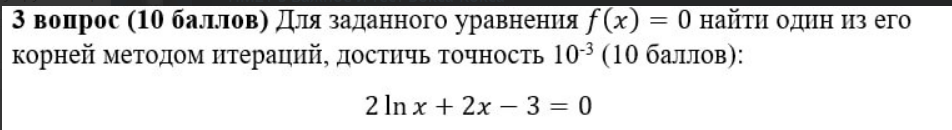

In [23]:
def task3(f, f_x, x_start, eps=1e-3):
    X = x_start
    iter_count = 1
    while abs(f.subs(x, X)) > eps:
        X = round(f_x.subs(x, X), 5)
        iter_count += 1
    return X, iter_count

In [28]:
F = sp.sin(x) + 2*x**2 - 5 # функция как она в задании
F_x = ((5 - sp.sin(x)) / 2)**0.5 # функция вида x = g(x)
res = task3(F, F_x, 1)
res

(1.41633, 4)

In [32]:
F.subs(x, res[0])

7.58171e-5

### Метод 3/8

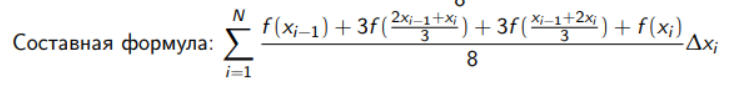

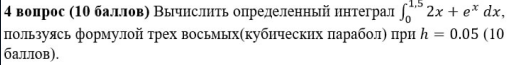

In [19]:
def calc_38(func, a, b, n):    
    xi = np.linspace(a, b, n)
    fu = []
    for i in range(n - 1):
        fu.append(round((func.subs(x, xi[i]) + 3*func.subs(x, (2*xi[i] + xi[i+1])/3) 
          + 3*func.subs(x, (xi[i] + 2*xi[i+1])/3) + func.subs(x, xi[i + 1])) / 8 * abs(xi[i] - xi[i + 1]), 10))
    return sum(fu)

In [43]:
x = sp.symbols('x')
f = 2*x + sp.exp(x) # функция
n = 30 # количество разбиений
a, b = 0, 1.5 # пределы интегрирования
calc_38(f, a, b, n)

5.731689074

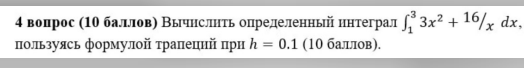
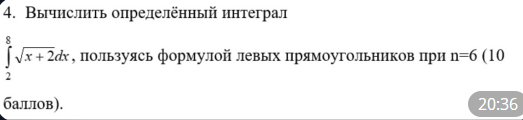

In [65]:
# формулы прямоугольников
h = (8 - 2) / 6
xi = [2 + i*h for i in range(7)]
yi = [(xi[i] + 2)**0.5 for i in range(7)]
yi_s = [(xi[i] + h/2 + 2)**0.5 for i in range(7)]
I_L = h * sum(yi[:-1])
I_R = h * sum(yi[1:])
I_S = h * sum(yi_s[:-1])
I_L, I_R, I_S

(15.159736156093748, 16.322013816262128, 15.752333716700718)

In [40]:
# формула трапеций
h = 0.1
xi = [1 + i*h for i in range(21)]
yi = [3*x**2 + 16/x for x in xi]
I = h/2 * (yi[0] + 2*sum(yi[1:-1]) + yi[-1])
I

43.59963536456753

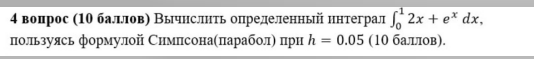

In [105]:
h = 0.05
xi = [i*h for i in range(21)]
yi = [2*x + np.exp(x) for x in xi]
I_simp = h/3 * (yi[0] + yi[-1] + 4*sum(yi[1::2]) + 2*sum(yi[2:-1:2]))
I_simp

2.7182818881038564

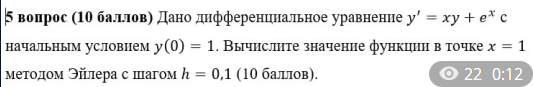

In [68]:
x, y = sp.symbols('x, y')
f = x*y + sp.sin(x)
f

x*y + sin(x)

In [72]:
# Метод Эйлера
def func(xi, yi, h, f, X):
    while xi < X:
        yi = yi + h * f.subs([(x, xi), (y, yi)])
        xi += h
    return yi

func(xi=0, yi=2, h=0.1, f=f, X=1)

4.04912602688670

In [82]:
# усовершенствованный
def euler(xi, yi, h, f, X):
    while xi < X - h:
        yi_ = yi + h * f.subs([(x, xi), (y, yi)])
        xi_ = xi + h
        yi = yi + h/2 *(f.subs([(x, xi), (y, yi)]) + f.subs([(x, xi_), (y, yi_)]))
        xi += h
    return yi

euler(xi=0, yi=2, h=0.1, f=f, X=1)

0 2
0.1 2.01499167083234
0.2 2.06044301585065
0.30000000000000004 2.13757970502069
0.4 2.24851551038124
0.5 2.39636296376020
0.6 2.58539914842842
0.7 2.82129868797649
0.7999999999999999 3.11145128555687
0.8999999999999999 3.46538812189261


3.89535076929083

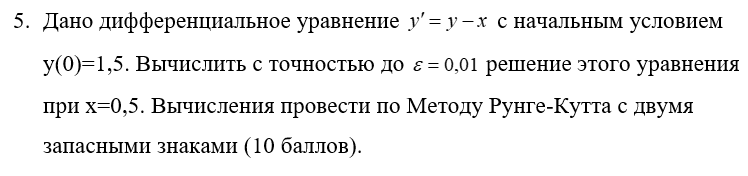

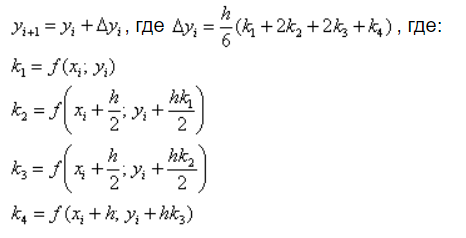

In [112]:
def unga_bunga(xi, yi, h, f, X):
    while xi < X - h:
        k1 = f.subs([(x, xi), (y, yi)])
        k2 = f.subs([(x, xi + h/2), (y, yi + h*k1/2)])
        k3 = f.subs([(x, xi + h/2), (y, yi + h*k2/2)])
        k4 = f.subs([(x, xi + h), (y, yi + h*k3)])
        delta_yi = h/6*(k1 + 2*k2 + 2*k3 + k4)
        yi = yi + delta_yi
        xi += h
    return yi

x, y = sp.symbols('x, y')
F = y - x
unga_bunga(xi=0, yi=1.5, h=0.001, f=F, X=0.5)

2.32253668675767